# WineWiseAI - Wine Quality Prediction


## Group F
###### DIVYA DATTATRAY SAKHARE
###### SRAVYA KALLURI
###### NOOR AHAMED VEMPALLE
###### NIKIL VALUSA

In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [6]:
# loading the dataset to a Pandas DataFrame
Red_wine_dataset = pd.read_csv('C:/Users/Valusa Nikil/Downloads/winequality-red.csv')
White_wine_dataset = pd.read_excel('C:/Users/Valusa Nikil/Downloads/winequality-white.xlsx')

In [7]:
# number of rows & columns in the red wine dataset
Red_wine_dataset.shape

(1599, 12)

In [8]:
## number of rows & columns in the white wine dataset
White_wine_dataset.shape

(4898, 12)

In [9]:
# Assigning 1 for red wine
Red_wine_dataset['type']=1

In [10]:
## Assigning 0 for white wine
White_wine_dataset['type']=0

In [11]:
Red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
White_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [13]:
# Appending two datasets into one
wine_dataset=pd.concat([Red_wine_dataset, White_wine_dataset], axis=0)
wine_dataset=wine_dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,11]]

In [10]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [14]:
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7


In [16]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [17]:
# statistical measures of the dataset
wine_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [18]:
#count for quality
wine_dataset.groupby("quality").size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

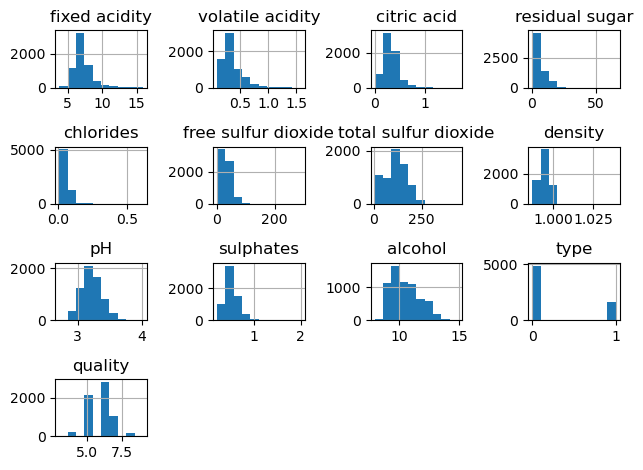

In [14]:
#Plotting histogram for all features
wine_dataset.hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

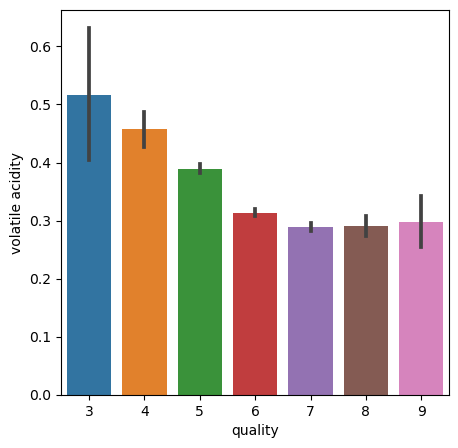

In [15]:
# plotting relation for volatile acidity and quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

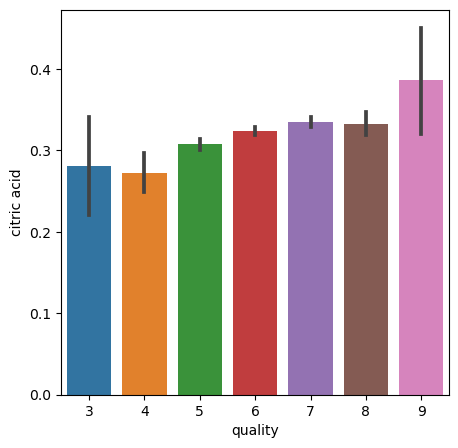

In [16]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

<Axes: >

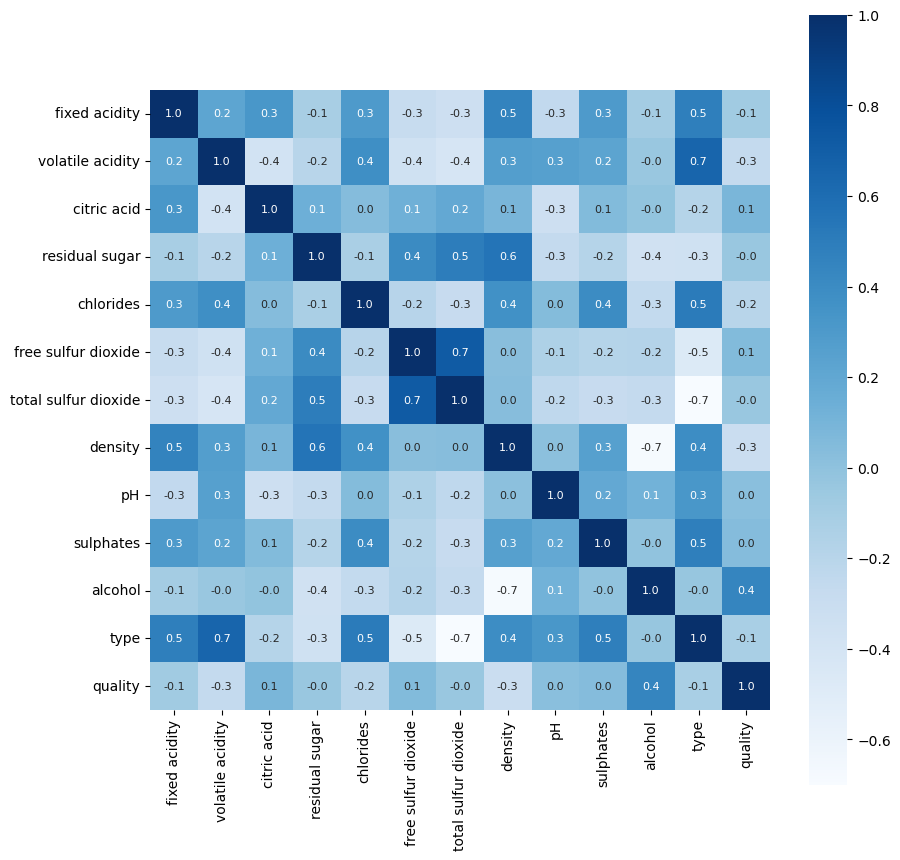

In [17]:
# plotting correlation matrix
correlation = wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [18]:
# correlation between features and the label:
wine_dataset.corr()["quality"].apply(lambda x:abs(x)).sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
type                    0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

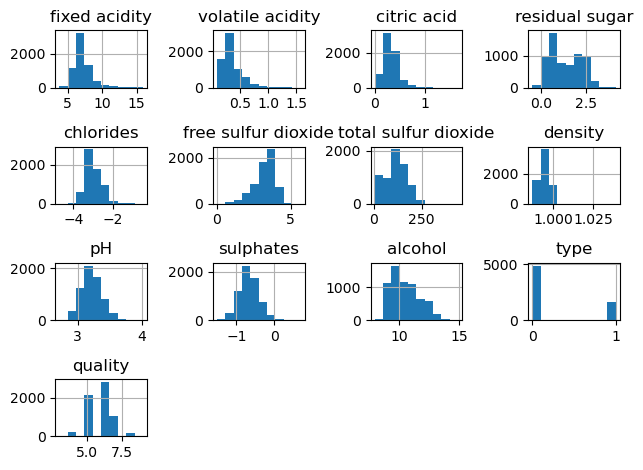

In [19]:
# the right scewed issue:

# we apply a log transform to right-skewed features:
def log_transform(col):
    return np.log(col[0])

wine_dataset['residual sugar'] = wine_dataset[['residual sugar']].apply(log_transform, axis=1)
wine_dataset['chlorides'] = wine_dataset[['chlorides']].apply(log_transform, axis=1)
wine_dataset['free sulfur dioxide'] = wine_dataset[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_dataset['sulphates'] = wine_dataset[['sulphates']].apply(log_transform, axis=1)

# # and plot the distributions again to see if the issue is fixed:
wine_dataset.hist()
plt.tight_layout()
plt.show()

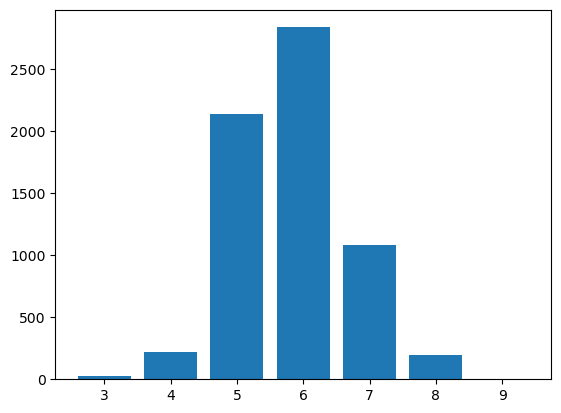

In [20]:
# the imbalance issue:
fig, ax = plt.subplots()
ax.bar(sorted(wine_dataset["quality"].unique()), wine_dataset.groupby("quality").size())
plt.show()

# we groupby quality. We undersample the category '5' and '6'
# and oversample the remaining ones, both to 600 counts.

In [21]:
# oversample minority class to make balance data:


Wine_3 = wine_dataset[wine_dataset.quality==3]    
Wine_4 = wine_dataset[wine_dataset.quality==4]          
Wine_7 = wine_dataset[wine_dataset.quality==7]
Wine_8 = wine_dataset[wine_dataset.quality==8]
Wine_9 = wine_dataset[wine_dataset.quality==9]

Wine_3_upsampled = resample(Wine_3, replace=True, n_samples=1500, random_state=43) 
Wine_4_upsampled = resample(Wine_4, replace=True, n_samples=1500, random_state=43) 
Wine_7_upsampled = resample(Wine_7, replace=True, n_samples=1500, random_state=43)
Wine_8_upsampled = resample(Wine_8, replace=True, n_samples=1500, random_state=43)
Wine_9_upsampled = resample(Wine_9, replace=True, n_samples=1500, random_state=43)

# decreases the rows of the majority class to make balance data:
Wine_5 = wine_dataset[wine_dataset.quality==5]
Wine_6 = wine_dataset[wine_dataset.quality==6]

Wine_5_downsampled = resample(Wine_5, replace=False, n_samples=1500, random_state=43)
Wine_6_downsampled = resample(Wine_6, replace=True, n_samples=1500, random_state=43)

# combine downsampled majority class with upsampled minority class
wine_dataset_balanced = pd.concat([Wine_3_upsampled, Wine_4_upsampled, Wine_7_upsampled, 
                         Wine_8_upsampled, Wine_5_downsampled, Wine_6_downsampled])

wine_dataset_balanced = wine_dataset_balanced.reset_index(drop=True)

# display new class counts
wine_dataset_balanced["quality"].value_counts() 

3    1500
4    1500
7    1500
8    1500
5    1500
6    1500
Name: quality, dtype: int64

In [22]:
# splitting data into train and test
arr = wine_dataset_balanced.values
X = arr[:,0:-1]
Y = arr[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=43)

In [23]:
print(Y.shape, Y_train.shape, Y_test.shape)

(9000,) (6750,) (2250,)


In [24]:
#Applying random forest model
model = RandomForestClassifier()

In [25]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.888


In [28]:
# Applying all other models below
models = {'LR': LogisticRegression(solver='liblinear'),
            'LDA': LinearDiscriminantAnalysis(),
            'KNN': KNeighborsClassifier(),
            'CART': DecisionTreeClassifier(),
            'NB': GaussianNB(),
            'SVM': SVC(gamma='auto')}

results = []
labels = [] 
for label, model in models.items():
    kfold = KFold(n_splits=10, random_state=43, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    labels.append(label)
    print(f"{label}, {cv_results.mean()}, {cv_results.std()}")


LR, 0.3967407407407407, 0.014722676443027955
LDA, 0.40429629629629626, 0.017155146160278596
KNN, 0.7268148148148148, 0.01932978539887419
CART, 0.8284444444444444, 0.01581511839417187
NB, 0.3712592592592593, 0.015140131900493289
SVM, 0.6758518518518518, 0.020126349863990152


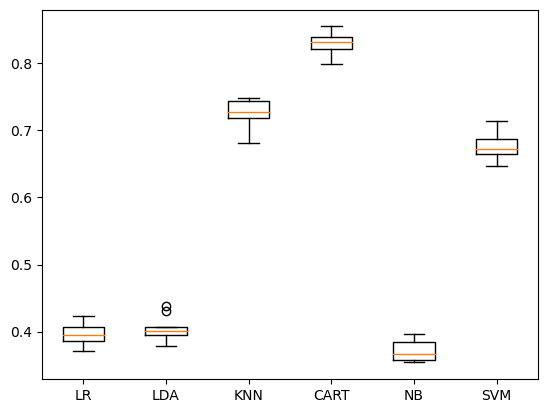

In [29]:
#Plotting boxplot for accuracy
fig, ax =  plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(labels)
plt.show()

In [30]:
pipelines = [('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])),
            ('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LASSO', LinearDiscriminantAnalysis())])),
            ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('EN', KNeighborsClassifier())])),
            ('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('KNN', DecisionTreeClassifier())])),
            ('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('CART', GaussianNB())])),
            ('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVR', SVC(gamma='auto'))]))]


results = []
labels = []
for label, pipeline in pipelines:
    kfold = KFold(n_splits=10, random_state=43, shuffle=True)
    cv_results = cross_val_score(pipeline, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    labels.append(label)
    print(f"{label}, {cv_results.mean()}, {cv_results.std()}")

ScaledLR, 0.40785185185185185, 0.010967966826002732
ScaledLDA, 0.40429629629629626, 0.017155146160278596
ScaledKNN, 0.7435555555555556, 0.01609914412945483
ScaledCART, 0.8306666666666667, 0.012589106271209991
ScaledNB, 0.37037037037037035, 0.013016819340141516
ScaledSVM, 0.6394074074074073, 0.016


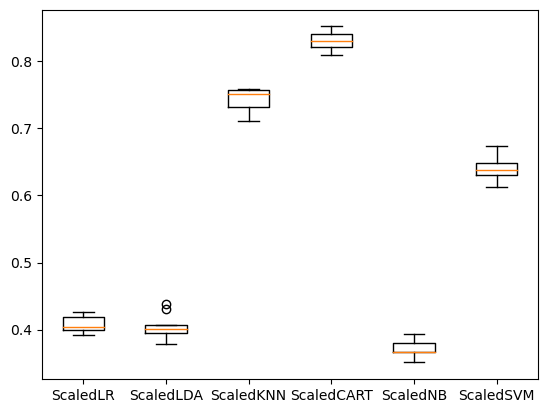

In [31]:
fig, ax = plt.subplots()
ax.boxplot(results)
ax.set_xticklabels(labels)
plt.show()

In [32]:
# Tune scaled CART

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = [3,5,7,9,11,13,15,17,19,21,23,25]
param_grid = dict(max_depth = max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=10, random_state=43, shuffle=True)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy", cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)


print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")


Best: 0.8274074074074076 using {'max_depth': 25}
0.36370370370370364 (0.010951946416756281) with: {'max_depth': 3}
0.4691851851851852 (0.01726482186627113) with: {'max_depth': 5}
0.563111111111111 (0.01941193048791103) with: {'max_depth': 7}
0.6534814814814814 (0.011711202473464688) with: {'max_depth': 9}
0.7210370370370371 (0.010684142063468334) with: {'max_depth': 11}
0.7635555555555555 (0.008385761006272533) with: {'max_depth': 13}
0.7865185185185185 (0.010337514088544891) with: {'max_depth': 15}
0.8099259259259259 (0.008939362869064056) with: {'max_depth': 17}
0.8197037037037038 (0.01126413149941948) with: {'max_depth': 19}
0.8262222222222222 (0.011571688643068736) with: {'max_depth': 21}
0.826074074074074 (0.012093826152271734) with: {'max_depth': 23}
0.8274074074074076 (0.01273126262438154) with: {'max_depth': 25}


In [33]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = DecisionTreeClassifier(max_depth=21)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledtestX = scaler.transform(X_test)
Y_pred = model.predict(rescaledtestX)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(Y_pred, Y_test))
print(confusion_matrix(Y_pred, Y_test))
print(classification_report(Y_pred, Y_test))

0.8511111111111112
[[374   0   6   3   1   0]
 [  0 387  31   7   4   0]
 [  0   0 211  61  11   0]
 [  0   0  80 254  27   0]
 [  0   0  25  48 310   0]
 [  0   0   5  19   7 379]]
              precision    recall  f1-score   support

         3.0       1.00      0.97      0.99       384
         4.0       1.00      0.90      0.95       429
         5.0       0.59      0.75      0.66       283
         6.0       0.65      0.70      0.67       361
         7.0       0.86      0.81      0.83       383
         8.0       1.00      0.92      0.96       410

    accuracy                           0.85      2250
   macro avg       0.85      0.84      0.84      2250
weighted avg       0.87      0.85      0.86      2250



In [34]:
input_data = (7.9,0.35,0.46,3.6,0.078,15,37,0.9973,3.35,0.86,12.8,1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]>6):
  print('Indulge in this exceptional wine; its a taste worth savoring.')
else:
  print('Consider exploring other wine options, as this one falls short in quality.')


[7.]
Indulge in this exceptional wine; its a taste worth savoring.
